In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import to_categorical

# Task 2

In [3]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
    
# Normalize pixel values to range [0,1] and flatten images
train_images = train_images.reshape(-1, 28*28).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28*28).astype('float32') / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
# Define the model architecture and compile
def build_model(input_size, hidden_sizes, output_size, loss, optimizer):
    model = keras.Sequential([
            layers.Dense(hidden_sizes[0], activation='relu', input_shape=(input_size,)),
            layers.Dense(hidden_sizes[1], activation='relu'),
            layers.Dense(output_size, activation='softmax')  # Softmax for classification
        ])

    model.compile(optimizer=optimizer,
                    loss=loss,
                    metrics=['accuracy'])
    
    return model

### Model 1

In [30]:
# Define hyperparameters
input_size = 28 * 28 # 784 pixels per image
output_size = 10 # 10 classes in FashionMNIST
hidden_sizes = [128, 64]


# Define model 1 hyperparameters
lr_1 = 0.001
loss_1 = 'huber'
optimizer_1 = keras.optimizers.Adam(learning_rate=lr_1)
batch_size_1 = 16

In [ ]:
# Build the model 1
model_1 = build_model(input_size, hidden_sizes, output_size, loss_1, optimizer_1)

# Train the model 1
history_1 = model_1.fit(train_images, train_labels, epochs=10, batch_size=batch_size_1, validation_split=0.2)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model 1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

Epoch 1/10
 717/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6737 - loss: 0.0217

In [41]:
# Evaluate the model 1
test_loss, test_acc = model_1.evaluate(test_images, test_labels)

print(f'Test Accuracy: {test_acc * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.8655 - loss: 0.0099
Test Accuracy: 86.53%


### Model 2

In [20]:
# Define model 2 hyperparameters
lr_2 = 0.01
loss_2 = 'mean_squared_error'
optimizer_2 = keras.optimizers.SGD(learning_rate=lr_2)
batch_size_2 = 8

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.4211 - loss: 0.0764 - val_accuracy: 0.6812 - val_loss: 0.0469
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.6944 - loss: 0.0441 - val_accuracy: 0.7604 - val_loss: 0.0372
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.7685 - loss: 0.0364 - val_accuracy: 0.7946 - val_loss: 0.0321
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8017 - loss: 0.0313 - val_accuracy: 0.8088 - val_loss: 0.0293
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8146 - loss: 0.0288 - val_accuracy: 0.8129 - val_loss: 0.0279
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8214 - loss: 0.0270 - val_accuracy: 0.8252 - val_loss: 0.0263
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8297 - loss: 0.0259 - val_accuracy: 0.8257 - val_loss: 0.0255
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8361 - loss: 0.0247 - 

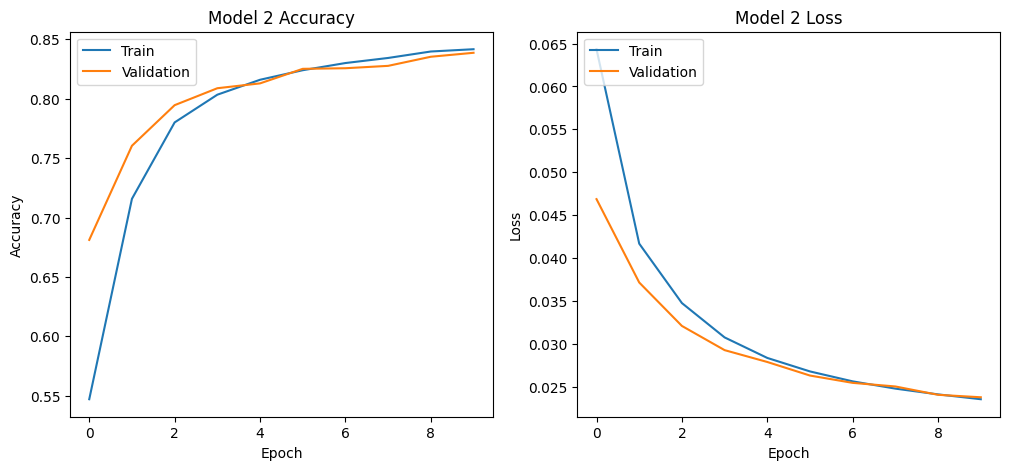

In [21]:
# Build the model 2
model_2 = build_model(input_size, hidden_sizes, output_size, loss_2, optimizer_2)

# Train the model 2
history_2 = model_2.fit(train_images, train_labels, epochs=10, batch_size=batch_size_2, validation_split=0.2)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model 2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [28]:
# Evaluate the model 2
test_loss, test_acc = model_2.evaluate(test_images, test_labels)

print(f'Test Accuracy: {test_acc * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.8367 - loss: 0.0243
Test Accuracy: 82.79%
